<center><b><font size=6>Machine Learning for Networking <b><center>
<center><b><font size=6>Lab 9 <b><center>
<center><b><font size=6>    Unsupervised learning: Clustering<b><center>

### Objective: Learn how to use different clustering techniques

Clustering is unsupervised learning. We want to assign data samples to different groups based on their similarity/proximity. As a result, we can derive, explain, and utilize the properties of such groups. We do not have nor use labels for clustering task, and we use unsupervised metrics to evaluate the performance. However, we can also use labeled data to better understand the obtained clusters with supervised metrics. 

1. **k-Means** is a hard clustering approach (each sample is associated with one and only one cluster), that partitions m observations to k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid). Useful links: <a href="https://en.wikipedia.org/wiki/K-means_clustering">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">K-means in sklearn</a>.
2. **Gaussian mixture model (GMM)** is a soft clustering appproach that provides the degree of beloging of each of the m observation to k different clusters. Each cluster is represented by a gaussian distribution.  Useful links: <a href="https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">GMM in sklearn</a>.
3. **Density-based spatial clustering of applications with noise (DBSCAN)** is a density-based hard clustering algorithm, that groups together samples that are connected together in an empirical graph, defining core points, border points, and outliers. Useful links: <a href="https://en.wikipedia.org/wiki/DBSCAN">Wiki</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN">DBSCAN in sklearn</a>.

### 1. Import needed libraries

In [1]:
#To upgrade scikit learn to latest version. Then restart kernel. You need to run this cell only once.
!python -m pip install scikit-learn --upgrade 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.0 MB 12.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/11.0 MB 13.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.0 MB 16.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 15.9 MB/s eta 0:00:01
   ---------------- -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
adversarial-robustness-toolbox 1.17.0 requires scikit-learn<1.2.0,>=0.22.2, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
#Libraries for the tutorial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

## 2. Tutorial - Clustering

In the tutorial we will use the classical IRIS dataset

In [10]:
# load dataset of IRIS flowers
from sklearn import datasets
iris_data = datasets.load_iris()
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris_data.data, columns = features_iris)
df_iris['type'] = 'setosa'
df_iris.loc[50:99, 'type'] = 'versicolor'
df_iris.loc[100:149, 'type'] = 'virginica'

## 2.1 k-Means

k-Means needs as hyper-parameter the number of clusters k.
Another hyper-parameter is the initialization strategy for the centroid ``init``:
- *random*: centroids will be initialized randomly in the valid data region. You can specify the ``random_state``. Changing the random state may change the result due to a different centroid inizialization.
- *k-means++*: centroids will be equally distant from each other, leading to provably better results than random initialization.
- ndarray: if you have a clue about where centroids could be, you can pass them (i.e. their coordinates) as initialization.

Moreover, ``n_init`` is the number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of clustering error. 

For the tutorial, we will not perform any pre-processing step and directly apply k-Means.
To create the clusters the ``.fit()`` function creates the clustering function and clusters, by minimizing the clustering error on the data.

Here we are using n_init=1 and random initialization. Try to change the used features ``features_iris``, and the hyper-parameters ``n_clusters`` and ``random_state`` and see what changes

In [16]:
features_iris = ['sepal_length', 'petal_length'] # the four features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

kmeans = KMeans(n_clusters=3, init='random', random_state=None, n_init=1)
kmeans.fit(df_iris[features_iris])

# print the clustered labels
print('The clustered labels are:\n', kmeans.labels_)
print()

# print the centroid of each feature for each cluster
print('The centroids are:\n', kmeans.cluster_centers_)
print()

The clustered labels are:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

The centroids are:
 [[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]



C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


You can also visualize the points and their assignments. The following function will show the result if you have 2 features (2D scatter plot). If you have more dimensions, you can plot all the couples of features, or first perform dimensionality reduction (e.g., PCA).

In [17]:
# Helper function to plot the clustering -- only 2 dimensione (if more, it will plot only the first two columns).
def plot_clustering(X, labels, centers=None, title="", subplot=None):

    # Plot in given subplot
    if subplot:
        plt.subplot(subplot)

    # Plot data with labels as color
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 0], centers[:, 1], c="red", s=150, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

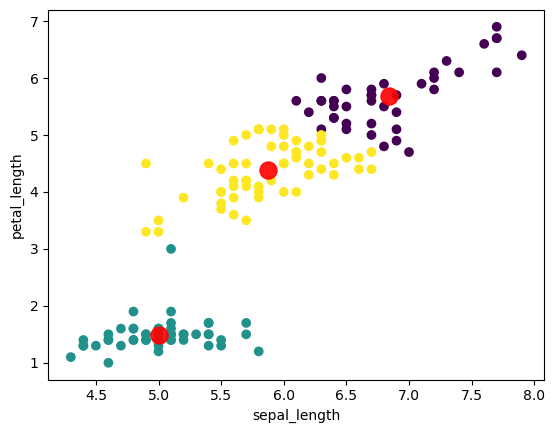

In [18]:
plot_clustering(df_iris[features_iris], kmeans.labels_, kmeans.cluster_centers_)

### Unsupervised clustering performance

After having computed the clusters, we can obtain clustering performance metrics:

- the metric minimized in the clustering algorithm for the empirical data (for k-Means, the mean squared distance of the points from their own centroid)
- the silhouette to measure the similarity of a sample to its own cluster, compared to other clusters (<a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Wiki</a>)

See how the results change by changing the hyper-parameters

In [19]:
#Sum of squared distances of samples to their closest cluster center.
print("Sum of squared distances of the samples from their centroid: ", kmeans.inertia_)
# If we divide it by number of sample m, it is the clustering error we have seen in theoretical lectures
print("Mean squared distances of the samples from their centroid: ", kmeans.inertia_/len(df_iris))

# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ",silhouette_score(df_iris[features_iris], kmeans.labels_))

Sum of squared distances of the samples from their centroid:  53.809978644106934
Mean squared distances of the samples from their centroid:  0.3587331909607129
Silhouette score of the samples:  0.5890584158017611


We can also compare clusters with the ground-truth labels (or with a different clustering):
- Rand index (RI): given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the Rand index is a function that measures the similarity of the two assignments,
- Adjusted rand index (ARI): corrects the RI for chance and will give a baseline at 0.

In [20]:
# To compute the rand index and adjusted rand index sklearn provides the rand_score and adjusted_rand_score functions
rand_score_result = rand_score(df_iris["type"], kmeans.labels_)
adj_rand_score_result = adjusted_rand_score(df_iris["type"], kmeans.labels_)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)


RI between clustering and given classes is  0.8663982102908278
ARI between clustering and given classes is  0.6988627672348092


### Performance by changing k

k can be chosen based on different criteria. For example:
- Defined by application 
- Desired compression rate
- Elbow (or knee) method 
- Validation error

Here we will run the clustering algorithms with different values of k and evaluate the performances. 

In [21]:
# Here we only have to run k-means with different values of k. 
# You could also run k-means with the same value of k but different random_seed to check different centroids initialization.

#choose the features you want to work on  
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

kmeans_results = []
for k in range(2, 21):
    kmeans_results.append(KMeans(n_clusters=k).fit(df_iris[features_iris]))

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

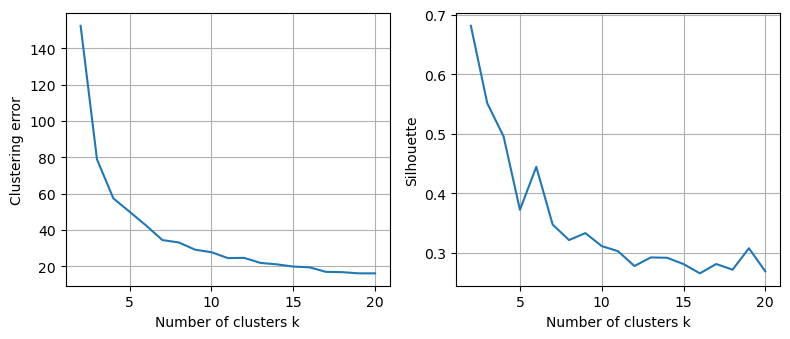

In [22]:
fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [k for k in range(2,21)], 
    [result.inertia_ for result in kmeans_results]
)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error")
axs[0].grid()

axs[1].plot(
    [k for k in range(2,21)], 
    [silhouette_score(df_iris[features_iris], result.labels_) for result in kmeans_results]
)
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette")
axs[1].grid()

plt.tight_layout()
plt.show()

Here the two plots show contrasting objectives: for clustering error, increasing k will improve the results, while for silhouette increasing k will worsen the results. For clustering error, the addition of an additional cluster cannot result in a larger average distance from the points to their corresponding cluster means. It naturally follows that the raw clustering error will always favour a larger number. Hence, by looking at the silhouette a small number of k is more appropriate.

## 2.2 Gaussian Mixture Model

GMM need as hyper-parameter the number of clusters k (``n_components``).

Another hyper-parameter is the initialization strategy for the centroids ``init_params``:
- ‘kmeans’ : responsibilities are initialized using k-Means.
- ‘random’ : responsibilities are initialized randomly.

For the tutorial, we will not perform any pre-processing step and directly apply GMM.
To create the clusters the ``.fit()`` function creates the clustering function and clusters, by maximizing the log-likelihood on the data.

Try to change the used features ``features_iris``, and the hyper-parameters  and see what changes

In [23]:
features_iris = ['sepal_length', 'petal_length'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

gmm = GaussianMixture(n_components=3, init_params='kmeans')
gmm.fit(df_iris[features_iris])

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=3)

In [25]:
# print the sample mean vector of each gaussian
print('The centroids are:\n', gmm.means_)
print()

# print the sample covariance matrix of each gaussian
print('The covariance matrices are:\n', gmm.covariances_)
print()

# print the effective size of each cluster
print('The effective sizes are:\n', gmm.weights_)
#can be also computed as  [gmm_probs[:,0].sum()/len(gmm_probs), gmm_probs[:,1].sum()/len(gmm_probs),gmm_probs[:,2].sum()/len(gmm_probs) ]
print()

# print the degree of belonging to each cluster
gmm_probs = gmm.predict_proba(df_iris[features_iris])
with np.printoptions(precision=4, suppress=True): #to print only the first 4 digits
    print('The degrees of belonging (probabilities) for the samples are:\n', gmm_probs)
print()
      
# print the clustered labels
gmm_labels = gmm.predict(df_iris[features_iris])
print('The clustered labels are:\n', gmm_labels)
print()

The centroids are:
 [[6.58889015 5.63329865]
 [5.00600062 1.46199859]
 [6.04240837 4.41743067]]

The covariance matrices are:
 [[[0.48521838 0.36602448]
  [0.36602448 0.32601112]]

 [[0.12176526 0.01602832]
  [0.01602832 0.02955648]]

 [[0.281197   0.23747006]
  [0.23747006 0.31503234]]]

The effective sizes are:
 [0.26788284 0.33333226 0.3987849 ]

The degrees of belonging (probabilities) for the samples are:
 [[0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [0.     

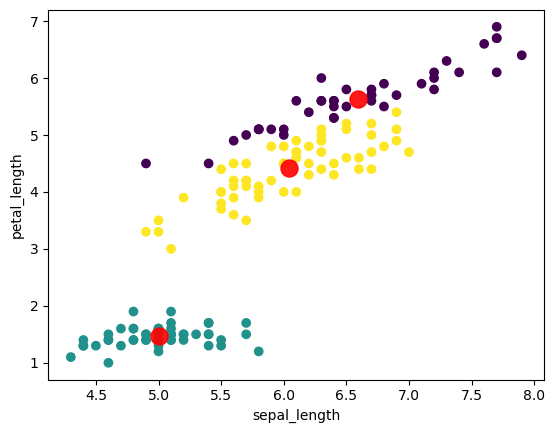

In [26]:
#visualize the cluster (only first two dimensions)
plot_clustering(df_iris[features_iris], gmm_labels, gmm.means_)

### Unsupervised clustering performance

After having computed the clusters, measure the log-likelihood and the average silhouette. 
See how the results change by changing the hyper-parameters.

In [27]:
#sum of logarithm of probability to sample data points under Gaussian mixture model (higher is better)
print("Total log-likelihood score: ", gmm.score(df_iris[features_iris]) )

# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ",silhouette_score(df_iris[features_iris], gmm_labels))

Total log-likelihood score:  -1.66980098928354
Silhouette score of the samples:  0.502287790846936


As previously, compare clusters with the ground-truth labels

In [28]:
# To compute the rand index and adjusted rand index sklearn provides the rand_score and adjusted_rand_score functions

rand_score_result = rand_score(df_iris["type"], gmm_labels)
adj_rand_score_result = adjusted_rand_score(df_iris["type"], gmm_labels)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)

RI between clustering and given classes is  0.8987919463087248
ARI between clustering and given classes is  0.7720038802323269


## 2.3 Density Based Clustering DBSCAN

Both k-means and GMM cluster data points using a distance measure from a reference point, which is a natural measure of similarity in many cases. However, in some applications, the data conforms to a different (non-Euclidian) structure. In this case, there are clustering techniques based on the notion of connectivity. Here, two data points are considered similar if they can be reached by intermediate data points that have a small (Euclidean) distance. 

In contrast to k-means and the GMM, DBSCAN does not require the number of clusters to be pre-defined -  the obtained number will depend on its parameters. Moreover, DBSCAN detects outliers that are interpreted as degenerated clusters consisting of a single data point.

DBSCAN requires specifying two parameters  `eps` and `min_samples`. The meaning of these parameters are well explained [here](https://scikit-learn.org/stable/modules/clustering.html#dbscan).  We need to set the eps and min_samples parameters, and tune DBSCAN epsilon based on Silhouette index.

For the tutorial, we will not perform any pre-processing step and directly apply DBSCAN.
To create the clusters the ``.fit()`` function creates the clustering function and clusters.

Try to change the used features ``features_iris``, and the hyper-parameters  and see what changes

In [51]:
features_iris = ['sepal_length', 'petal_length'] # the five features are ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# fit the DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=3)
dbscan.fit(df_iris[features_iris])

DBSCAN(eps=0.4, min_samples=3)

In [52]:
# note that the labels generated by DBSCAN might contain -1 values as result, representing outliers
# print the clustered labels
print('The clustered labels are:\n', dbscan.labels_)
print()

The clustered labels are:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]



In [53]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


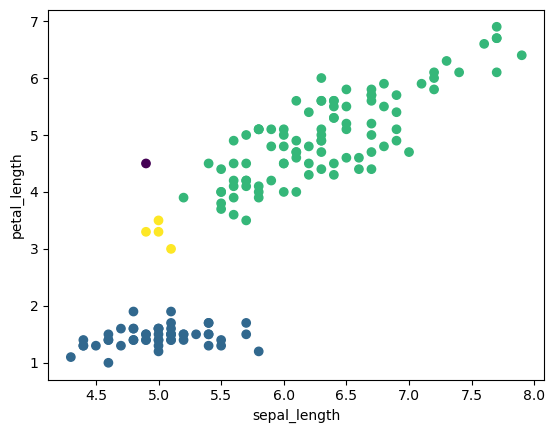

In [54]:
#visualize the clusters (only first two dimensions)
plot_clustering(df_iris[["sepal_length", "petal_length"]], dbscan.labels_)

Tune DBSCAN based on silhouette score. Here we only tune eps.

In [57]:
dbscan_results = []
for eps in np.arange(0.05, 0.9, .1): #from 0.05 to 0.9 with steps of 0.1
    dbscan_tmp = DBSCAN(eps=eps, min_samples=3)
    dbscan_tmp.fit(df_iris[features_iris])
    dbscan_results.append((eps, dbscan_tmp))

In [58]:
dbscan_tmp = DBSCAN(eps=0.05, min_samples=3)
dbscan_tmp.fit(df_iris[features_iris])
dbscan_tmp.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1,  0, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [59]:
silhouettes_dbscan = []
silhouettes_dbscan_noOutliers= []

for eps, dbscan_result in dbscan_results:

    # compute silhouette score
    score = silhouette_score(df_iris[features_iris], dbscan_result.labels_)
    silhouettes_dbscan.append((eps, score))
    
    # compute silhouette score only of clustered samples (not noise, i.e., not -1)
    score = silhouette_score(
        df_iris[~df_iris.index.isin(np.where(dbscan_result.labels_ == -1)[0])][features_iris], 
        np.delete(dbscan_result.labels_, np.where(dbscan_result.labels_ == -1))
    )
    silhouettes_dbscan_noOutliers.append((eps, score))
   


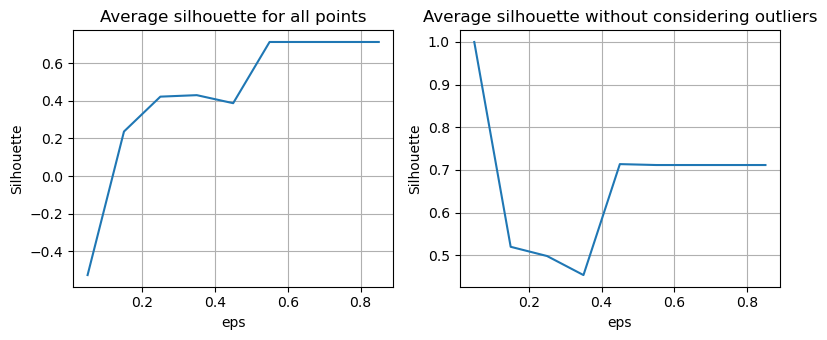

In [60]:
fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [eps for (eps, _) in silhouettes_dbscan], 
    [score for (_, score) in silhouettes_dbscan] 
)
axs[0].set_xlabel("eps")
axs[0].set_ylabel("Silhouette")
axs[0].set_title("Average silhouette for all points")
axs[0].grid()

axs[1].plot(
    [eps for (eps, _) in silhouettes_dbscan_noOutliers], 
    [score for (_, score) in silhouettes_dbscan_noOutliers] 
)
axs[1].set_xlabel("eps")
axs[1].set_ylabel("Silhouette")
axs[1].set_title("Average silhouette without considering outliers")
axs[1].grid()

plt.tight_layout()
plt.show()

Considering all points, silhouette becomes very low with a small epsilon. This is because all the samples will be considered noise/outliers. Best results are obtained for larger epsilon (with 2 clusters). Notice that if epsilon becomes very large (e.g., eps=3) all points will be in a single cluster, and silhouette cannot be computed. The second plot accounts only for points that are clustered (removing outliers). A very small eps here seems to suggest better results: however, most of the points are considered noise and only very few points are in the found clusters, with high silhouette (points close to each other and far from the other clusters)

## 3. Exercise - Darknet traffic

A darknet is a network of passive IP addresses not hosting any services. Thus, all the darknet ports are open and the received traffic is stored. In this laboratory, you will work on traces referred to darknet traffic. 

You will develop an unsupervised ML pipeline for clustering the source IP addresses that send traffic to the darknet.  Firstly, you are asked to generate features for the source IP addresses from the raw dataset per packet. Then you will explore three different clustering algorithms (k-Means, GMM and DBSCAN) and analyze the results. IPs belonging to the same cluster should perform similar activities. 

We also provide you with the labels of these IP addresses as Ground Truth (GT). Each label is referred to a project running Internet scanning, mapping or security services. Therefore, you can compare the obtained unsupervised clustering with the GT.

In [61]:
# Import libraries for the exercise
import pandas
import sklearn

### 3.1 Features generation and pre-processing
In the file ``darknet_traces.csv`` you will find logs of darknet traffic. Each record reports the following information:
- ts: timestamp of the received packet
- src_ip: source IP address from which the packet was sent
- src_port: source port from which the packet was sent
- dst_ip: darknet IP address that the packet reached
- dst_port: darknet port the packet reached
- proto: protocol used
- pck_len: length of the packet (bytes)
- ttl: packet time to live (seconds)

In [62]:
# Load dataset
df = pd.read_csv('darknet_traces.csv')
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,pck_len,ttl
0,1.619827e+09,92.63.196.13,57340,130.192.166.135,11676,tcp,60,243
1,1.619827e+09,172.245.79.122,57026,130.192.166.46,23,tcp,60,235
2,1.619827e+09,1.85.44.226,38567,130.192.166.84,1433,tcp,60,225
3,1.619827e+09,163.172.106.63,47018,130.192.166.197,15467,tcp,60,243
4,1.619827e+09,163.172.106.63,47018,130.192.166.104,15467,tcp,60,243
...,...,...,...,...,...,...,...,...
499995,1.619854e+09,45.144.214.11,50689,130.192.166.10,3040,tcp,60,244
499996,1.619854e+09,167.248.133.69,7831,130.192.166.158,2002,tcp,60,32
499997,1.619854e+09,92.63.196.13,57340,130.192.166.30,14528,tcp,60,243
499998,1.619854e+09,80.82.70.118,60000,130.192.166.247,1701,tcp,60,247


In this step you are asked to create a dataset with the features for each source IP address. 
Create the following 5 features (however, you can repeat the exercise with other features)

- Number of packets sent
- Average number of packets per darknet port ``dst_port`` 
**NOTE**: for each individual source IP address, get all the different ports and their corresponding number of rows, that is the number of packets for each port sent from the source IP. Finally, calculate the average as requested. 
- Average number of packets per darknet IP ``dst_ip``
- Average packet length
- Average packet ttl

In [112]:
grouped_by_ip_df = df.groupby("src_ip").count()
print(grouped_by_ip_df)

               ts  src_port  dst_ip  dst_port  proto  pck_len  ttl
src_ip                                                            
1.1.160.124     3         3       3         3      3        3    3
1.11.146.45     7         7       7         7      7        7    7
1.116.174.11    1         1       1         1      1        1    1
1.116.223.165   9         9       9         9      9        9    9
1.123.162.134   1         1       1         1      1        1    1
...            ..       ...     ...       ...    ...      ...  ...
99.49.113.248   1         1       1         1      1        1    1
99.61.83.139    3         3       3         3      3        3    3
99.84.144.85   10        10      10        10     10       10   10
99.9.99.134     1         1       1         1      1        1    1
99.99.194.212   1         1       1         1      1        1    1

[17220 rows x 7 columns]


In [124]:
# Your answer here

# Number of packets
grouped_by_ip_df = df.groupby("src_ip")
n_packets_per_ip = grouped_by_ip_df.count()['ts']
n_packets_per_ip.name = "pck_sent"
print(f"Number of packets per IP\n{n_packets_per_ip}")

# Avg number packets per dst_port
packets_per_port = df.groupby(["src_ip", "dst_port"])['ts'].count()
packets_per_port.name = "ppport"
packets_per_port = packets_per_port.reset_index().groupby("src_ip")["ppport"].mean()
print(f"Average number of packets per darknet port\n{packets_per_port}")

# Avg number packets per dst_ip
packets_per_ip = df.groupby(["src_ip", "dst_ip"])['ts'].count()
packets_per_ip.name = "ppip"
packets_per_ip = packets_per_ip.reset_index().groupby("src_ip")["ppip"].mean()
print(f"Average number of packets per darknet ip\n{packets_per_ip}")

# Avg pck_len and ttl
avg_packets_lenght = grouped_by_ip_df[['pck_len', 'ttl']].mean()
# avg_packets_lenght.name = "avg_pck_len"
print(f"Average packet lenght\n{avg_packets_lenght}")

# Merge all
new_df = n_packets_per_ip

for data in [packets_per_port, packets_per_ip, avg_packets_lenght]:
    new_df = pd.merge(new_df, data, left_index=True, right_index=True, how='outer')
print(f"New dataframe\n{new_df.head()}")
print(new_df.loc["92.63.196.13"])

Number of packets per IP
src_ip
1.1.160.124       3
1.11.146.45       7
1.116.174.11      1
1.116.223.165     9
1.123.162.134     1
                 ..
99.49.113.248     1
99.61.83.139      3
99.84.144.85     10
99.9.99.134       1
99.99.194.212     1
Name: pck_sent, Length: 17220, dtype: int64
Average number of packets per darknet port
src_ip
1.1.160.124      3.0
1.11.146.45      7.0
1.116.174.11     1.0
1.116.223.165    1.0
1.123.162.134    1.0
                ... 
99.49.113.248    1.0
99.61.83.139     3.0
99.84.144.85     2.0
99.9.99.134      1.0
99.99.194.212    1.0
Name: ppport, Length: 17220, dtype: float64
Average number of packets per darknet ip
src_ip
1.1.160.124      3.0
1.11.146.45      1.0
1.116.174.11     1.0
1.116.223.165    9.0
1.123.162.134    1.0
                ... 
99.49.113.248    1.0
99.61.83.139     1.0
99.84.144.85     2.0
99.9.99.134      1.0
99.99.194.212    1.0
Name: ppip, Length: 17220, dtype: float64
Average packet lenght
                  pck_len         tt

Now you can load the Ground Truth (GT) dataset in ``ground_truth.csv``. Merge the GT labels with the obtained dataset with features per source IP. 

In [138]:
# new_df.loc["167.248.133.19"]
len(df_gt)

988

In [139]:
df_gt = pd.read_csv('ground_truth.csv', index_col="ip", usecols=["ip", 'label'])
print(df_gt.head())
# Your answer here
df_merged = new_df.rename({"src_ip": "ip"}).merge(df_gt, left_index=True, right_index=True, how='inner')
print(df_merged.head())

                 label
ip                    
167.248.133.19  censys
162.142.125.24  censys
74.120.14.16    censys
74.120.14.24    censys
162.142.125.80  censys
                 pck_sent    ppport      ppip  pck_len         ttl   label
109.123.117.228        17  1.700000  1.000000     60.0  237.529412  rapid7
109.123.117.229        11  1.222222  1.100000     60.0  237.363636  rapid7
109.123.117.230        19  1.727273  1.117647     60.0  237.315789  rapid7
109.123.117.231        19  1.727273  1.357143     60.0  237.631579  rapid7
109.123.117.232        15  1.363636  1.000000     60.0  237.400000  rapid7


Analyze the obtained features. For example, plot the ECDF of the IP senders with respect to the number of sent packets. Is the number of sent packets constant among the different source IPs?

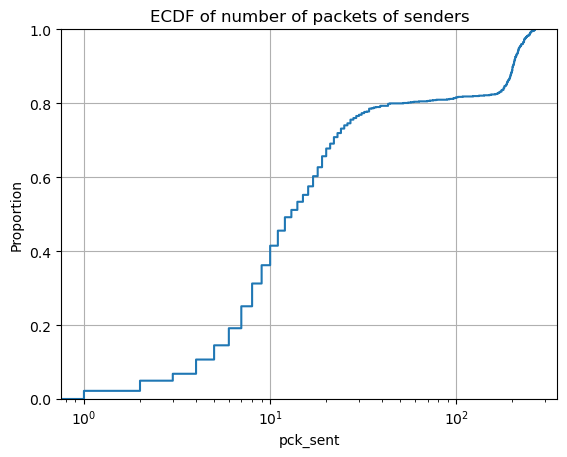

In [143]:
# Visualize the ECDF of number of packets 
import seaborn as sns
plt.figure()
sns.ecdfplot(df_merged['pck_sent'], log_scale=True) # x-axis is in logarithm scale
plt.title('ECDF of number of packets of senders')
plt.grid()
plt.show()

# Your answer here

Finally, before proceeding with the clustering algorithm, standardize the dataset.

**Note**: You are not using the labels (from the GT) as a feature, but keep track of them because you are going to use them later.

**Note**: Since clustering is an unsupervised ML technique, it is not mandatory to split the dataset in training, validation and testing.

In [ ]:
# Your answer here

### 3.2 k-Means
Let’s start from the first clustering algorithm: K-Means

- Fit the k-Means algorithm with ``n_clusters=3`` (as the number of labels).
- What is the size of the 3 clusters?
- Compute the clustering error, the silhouette score (unsupervised metric), the Rand Index (RI) and Adjusted Rand Index (ARI) with respect to the GT (supervised metrics).<br>




In [ ]:
# k-Means with n_clusters = 3

# Your answer here

Now analyze how the performance changes by changing k. 

    1. Try k in the [2, 15] range. For each iteration, compute the different scores.
    2. Plot the silhouette score for the different values of n_cluster. What is the best value of k, leading to the highest Silhouette.
    3. Has the performance improved on the other metrics? Plot the other metrics for the different values of n_cluster.

In [ ]:
# Step 1

# Your answer here

In [ ]:
# Step 2

# Your answer here

In [ ]:
# Step 3

# Your answer here

To better understand the detected cluster, we can visualize the clusters.

    - Reduce the feature dimensionality with a 2-component PCA. Fit the PCA on the full dataset and get the 2 Principal Components.
    - Get the scatter plots of the samples on the 2-components. Repeat it three times by colouring the clusters:
        1. K-Means clusters with 3 clusters
        2. Best K-Means clusters from the heuristic
        3. Original labels


In [ ]:
#2D PCA

# Your answer here

In [ ]:
#PLOTS

# Your answer here

### 3.3 GMM

Repeat the steps done in 3.2 for Gaussian Mixture models. Here the differences are:

- Since here you have also the degree of belonging, report the effective size instead of the size of each cluster.
- Consider the total log-likelihood score instead of the k-Means clustering error (sum of the squared error, aka inertia).


In [ ]:
# GMM with 3 components

# Your answer here

# report effective size

# Your answer here

# report usupervised and supervised metric

# Your answer here

In [ ]:
# Now analyze how the performance changes by changing k. 

#1. Try k in the [2, 15] range. For each iteration, compute the different scores.

# Your answer here

#2. Plot the silhouette score for the different values of n_cluster. What is the best value of k, leading to the highest Silhouette.

# Your answer here

#3. Has the performance improved also on the other metrics? Plot the other metrics for the different values of n_cluster.

# Your answer here


In [ ]:
# reuse 2D PCA
# plots

# Your answer here


### 3.4 DBSCAN

Repeat the steps done in 3.1 for DBSCAN. 

Being DBSCAN a density-based algorithm, you do not have to provide the number of clusters. Therefore, you cannot evaluate the performance by changing k. Instead, you have to perform a Grid Search on the ``epsilon`` and ``min_samples``. It consists of iterating over different values (combination) for two or more parameters, choosing the one leading to the best quality metrics.

- Vary ``epsilon`` from 0.01 to 2 with a step 0.1 and ``min_samples`` from 0 and 20 with a step 1. For each pair of values, fit an individual DBSCAN, and get the labels as well as compute the silhouette. Afterwards, report the results with a heatmap and select the values leading to the highest silhouette. 

Finally, compare the results among the three algorithms and highlight their pros and cons.

In [ ]:
# DBSCAN

# Your answer here

# report number and size of each cluster

# Your answer here

# report usupervised and supervised metric

# Your answer here

In [ ]:
# Now analyze the performance varying epsilon and min_samples.

# Your answer here

# Plot the silhouette score for the different values with a heatmap

# Your answer here

# Report the results of the best combination, also on other metrics


In [ ]:
# reuse 2D PCA
# plots

# Your answer here
